In [16]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error

En esta sesión de ejercicios, utilizará un conjunto de datos reales para entrenar un modelo de árbol de regresión. El conjunto de datos incluye información sobre las propinas de taxis y fue recopilado y proporcionado a la Comisión de Taxis y Limusinas de la Ciudad de Nueva York (TLC) por proveedores de tecnología autorizados por los Programas de Mejora de Pasajeros de Taxis y Limusinas (TPEP/LPEP). Utilizará el modelo entrenado para predecir el importe de la propina.

In [7]:
taxis = pd.read_csv('/content/yellow_tripdata.csv')
taxis

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


Cada fila del conjunto de datos representa un viaje en taxi. Como se muestra arriba, cada fila tiene 13 variables. Una de ellas es `"tip_amount"`, que será la variable objetivo.


Para comprender mejor el conjunto de datos, graficaremos la correlación de la variable objetivo con las variables de entrada.

<Axes: >

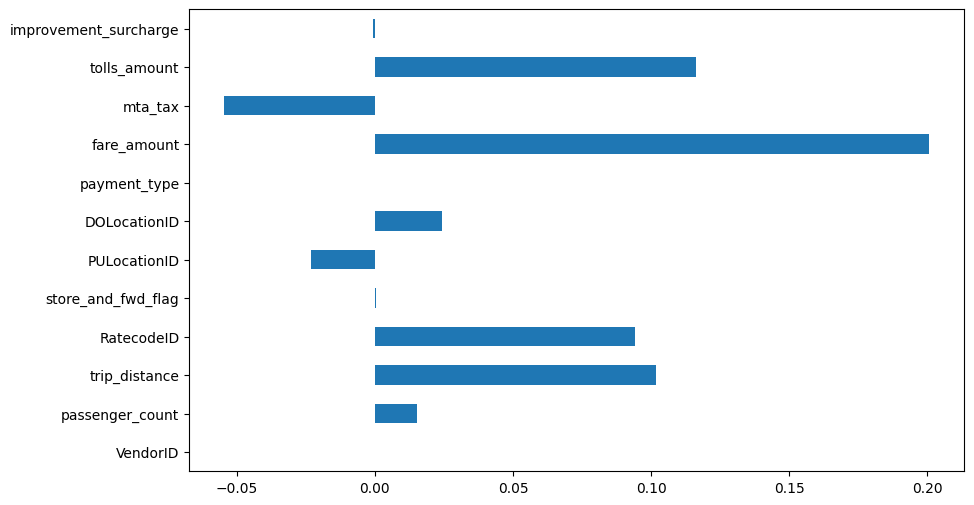

In [8]:
correlation_values = taxis.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

Esto nos muestra que las características de entrada `payment_type`, `VendorID`, `store_and_fwd_flag` y `improvement_surcharge` tienen poca o ninguna correlación con la variable de destino.



### Preprocesamiento de datos  

En esta etapa se revisaron las correlaciones de las variables de entrada con la variable objetivo `tip_amount`.  
Se observó que características como `fare_amount`, `trip_distance` y `tolls_amount` tienen mayor relación con el valor de la propina, mientras que otras (`payment_type`, `VendorID`, `store_and_fwd_flag`, `improvement_surcharge`) muestran poca o ninguna correlación.  

Dado que los árboles de decisión y sus variantes no dependen de la escala de las variables (dividen por umbrales en lugar de magnitudes absolutas), **no fue necesario aplicar normalización o estandarización de los datos**.  
Esto facilita el preprocesamiento, ya que los valores numéricos pueden usarse directamente como fueron recolectados.

### **MODELADO / ENTRENAMIENTO**

Para modelar este dataset con un árbol de regresión, primero lo dividimos en subconjuntos de entrenamiento y de prueba. Para ello, separamos la variable objetivo de las variables de entrada.

In [9]:
X = taxis.drop('tip_amount', axis=1)
y = taxis['tip_amount']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(28841, 12) (12361, 12)


Podemos definir ahora al árbol de Decisión como **dt_reg** y entrenarlo con los datos de ***entrenamiento***

In [20]:
taxiTree = DecisionTreeRegressor(criterion='squared_error', max_depth=8, random_state=35)
taxiTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

Para evaluar nuestro conjunto de datos, utilizaremos el método `score` del objeto `DecisionTreeRegressor`, que proporciona nuestros datos de prueba. Este número es el valor $R^2$, que indica el coeficiente de determinación. También evaluaremos el Error Cuadrático Medio $(MSE)$ del resultado de la regresión con respecto a los valores objetivo del conjunto de prueba. Se esperan valores altos de $R^2$ y bajos de $MSE$ de un buen modelo de regresión.

In [21]:
# R² (coeficiente de determinación):
r2 = taxiTree.score(X_test, y_test)

# Predicciones para calcular errores:
y_pred = taxiTree.predict(X_test)

# MSE (Error Cuadrático Medio):
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:   {r2:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")

R²:   0.0024
MSE:  25.1979
RMSE: 5.0197
MAE:  3.6019


### Evaluación del modelo de Árbol de Regresión

Los resultados del modelo con `max_depth=8` fueron los siguientes:

- **R²: 0.0024** → El coeficiente de determinación es cercano a cero, lo que indica que el modelo no explica casi nada de la variabilidad de los datos de propinas.  
- **MSE: 25.20** → El error cuadrático medio refleja que, en promedio, las predicciones del modelo se desvían bastante de los valores reales.  
- **RMSE: 5.02** → El error cuadrático medio en la misma escala que la propina indica que el modelo se equivoca en alrededor de **5 dólares** por viaje.  
- **MAE: 3.60** → En promedio, la diferencia absoluta entre la predicción y el valor real es de **3.6 dólares**.  

En resumen, aunque el árbol capturó algunas relaciones, su capacidad de generalización es muy limitada en este caso. Esto se puede deber a la alta complejidad y ruido en los datos de propinas de taxi, que suelen depender de factores no registrados en el dataset (como actitud del conductor, experiencia del pasajero, hora del día, etc.).  


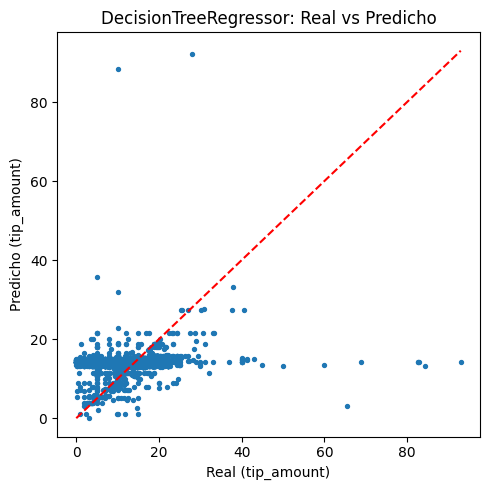

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')  # línea ideal y = x
plt.xlabel("Real (tip_amount)")
plt.ylabel("Predicho (tip_amount)")
plt.title("DecisionTreeRegressor: Real vs Predicho")
plt.tight_layout()
plt.show()

### Gráfico de dispersión: valores reales vs predichos  

En la gráfica se muestra la comparación entre los valores reales de propina (`tip_amount`) y los valores predichos por el modelo de Árbol de Regresión.  

- La línea roja discontinua representa la **predicción perfecta** (donde lo real = lo predicho).  
- Los puntos azules representan cada observación del dataset de prueba.  

Se observa que la mayoría de los puntos se concentran lejos de la línea roja, indicando que el modelo tiene **dificultades para aproximarse a los valores reales**. Esto confirma lo visto en las métricas (R² ≈ 0, MSE alto): el modelo **no logra explicar adecuadamente la variabilidad de las propinas**, probablemente debido a la alta aleatoriedad de este comportamiento y a la falta de variables que realmente influyen en la decisión del cliente al dar propina.  

En conclusión, aunque el árbol captura algunas relaciones entre variables, sus predicciones generales son poco precisas en datos de prueba. Este resultado es esperado en un problema tan ruidoso como la predicción de propinas. En este caso, probar **Random Forest** o **XGBoost**, que suelen manejar mejor el ruido al combinar muchos árboles podría funcionar.
